In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
xtrain1=xtrain/255
xtest1=xtest/255

In [5]:
ytrain.shape

(60000,)

In [6]:
xtrain1=xtrain1.reshape([-1,28,28,1])
xtest1=xtest1.reshape([-1,28,28,1])

In [7]:
ytrain1=np_utils.to_categorical(ytrain,10)
ytest1=np_utils.to_categorical(ytest,10)

In [8]:
#plt.imshow(xtrain1[0])

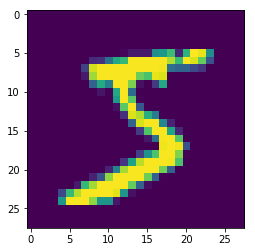

In [9]:
plt.imshow(xtrain[0])

In [10]:
def get_weights(shape):
    W=tf.Variable(tf.truncated_normal(shape,stddev=0.1,dtype=tf.float32))
    return W

def get_bias(length):
    b=tf.Variable(tf.constant(0.1,shape=[length],dtype=tf.float32))
    return b

In [11]:
def conv2d(X,W):
    return tf.nn.conv2d(X,W,strides=[1,1,1,1],padding='SAME')

# X   >> [batch, in_height, in_width, in_channels]
# W   >> [filter_height * filter_width * in_channels, output_channels]

In [12]:
def maxpool(X,f,s):
    return tf.nn.max_pool(X,ksize=[1,f,f,1],strides=[1,s,s,1],padding='SAME')

In [13]:
def convlayer(input1,shape):
    W=get_weights(shape)
    b=get_bias(shape[3])
    return tf.nn.relu(conv2d(input1,W)+b)

In [14]:
def normal_fc_layer(input1,size):
    shape1=int(input1.get_shape()[1])
    shape=[shape1,size]
    W=get_weights(shape)
    b=get_bias(size)
    return (tf.matmul(input1,W)+b)

In [15]:
X=tf.placeholder(tf.float32,shape=[None,28,28,1])
Y=tf.placeholder(tf.float32,shape=[None,10])

In [16]:
conv1=convlayer(X,[6,6,1,32])

In [17]:
max1=maxpool(conv1,2,2)

In [18]:
max1.get_shape()

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [19]:
conv2=convlayer(max1,[6,6,32,64])
max2=maxpool(conv2,2,2)

In [20]:
max2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [21]:
#Flatten
fl_layer=tf.reshape(max2,shape=[-1,7*7*64])
FC1=tf.nn.relu(normal_fc_layer(fl_layer,128))

In [22]:
FC1.get_shape()

TensorShape([Dimension(None), Dimension(128)])

In [23]:
hold_prob1=tf.placeholder(tf.float32)
hold_prob2=tf.placeholder(tf.float32)

In [24]:
drop1=tf.nn.dropout(FC1,keep_prob=hold_prob1)
FC2=normal_fc_layer(drop1,64)

In [25]:
drop2=tf.nn.dropout(FC2,keep_prob=hold_prob2)

In [26]:
ypred=normal_fc_layer(drop2,10)

In [27]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=ypred))

In [28]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
train=optimizer.minimize(cross_entropy)

In [29]:
init=tf.global_variables_initializer()

In [31]:
nepochs=5
batch_size=60
trainloss=[]
testloss=[]
with tf.Session() as s:
    s.run(init)
    for j in range(nepochs):
        for i in range(60000//batch_size):
            batch_x,batch_y=xtrain1[i*batch_size:(i+1)*batch_size],ytrain1[i*batch_size:(i+1)*batch_size]
            _,l=s.run([train,cross_entropy],feed_dict={X:batch_x,Y:batch_y,hold_prob1:0.3,hold_prob2:0.3})
            if i in [100,200,300,400,500]:
                
                l1=s.run(cross_entropy,feed_dict={X:xtest1,Y:ytest1,hold_prob1:0.3,hold_prob2:0.3})
                print("epoch:",j," and testloss:",l1)
                testloss.append(l1)

epoch: 0  and testloss: 1.2206224
epoch: 0  and testloss: 0.71960384
epoch: 0  and testloss: 0.58075154
epoch: 0  and testloss: 0.5551187
epoch: 0  and testloss: 0.50456804
epoch: 1  and testloss: 0.43662924
epoch: 1  and testloss: 0.57006395
epoch: 1  and testloss: 0.46326104
epoch: 1  and testloss: 0.5167423
epoch: 1  and testloss: 0.49642187
epoch: 2  and testloss: 0.5069963
epoch: 2  and testloss: 0.5308382
epoch: 2  and testloss: 0.66441125
epoch: 2  and testloss: 0.5691927
epoch: 2  and testloss: 0.4686712
epoch: 3  and testloss: 0.59222305
epoch: 3  and testloss: 0.72706807
epoch: 3  and testloss: 0.5233385
epoch: 3  and testloss: 0.6421174
epoch: 3  and testloss: 0.6078981
epoch: 4  and testloss: 0.47657877
epoch: 4  and testloss: 0.6250025
epoch: 4  and testloss: 0.571846
epoch: 4  and testloss: 0.5410773
epoch: 4  and testloss: 0.56425714


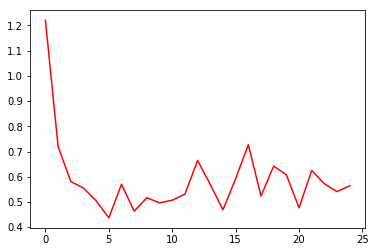

In [32]:
plt.plot(testloss,'r')